<a href="https://colab.research.google.com/github/Udayshaka/Forest_Fire_Detection/blob/main/Forest_Fire_Detection_using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense, Dropout,Input

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices)>0:
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
  print('GPU is Avaialable')
else:
  print('GPU is Unavailable')


GPU is Avaialable


In [7]:
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [11]:
classes = os.listdir(train_dir)
num_classes = len(classes)

print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')





Number of Classes: 2
Classes: ['nofire', 'fire']


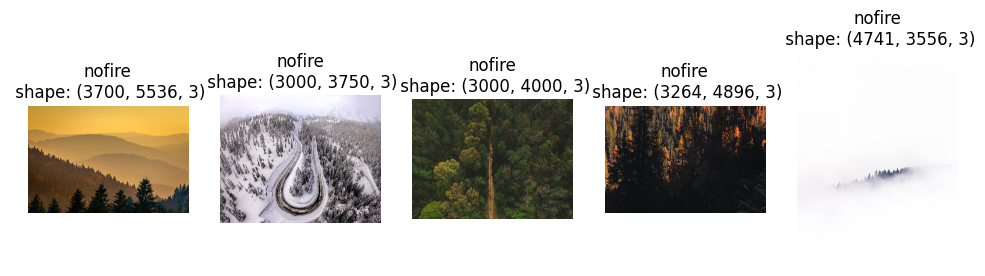

In [12]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path) [i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]}\n shape: {img.shape}')
  plt.axis('off')
plt.show()


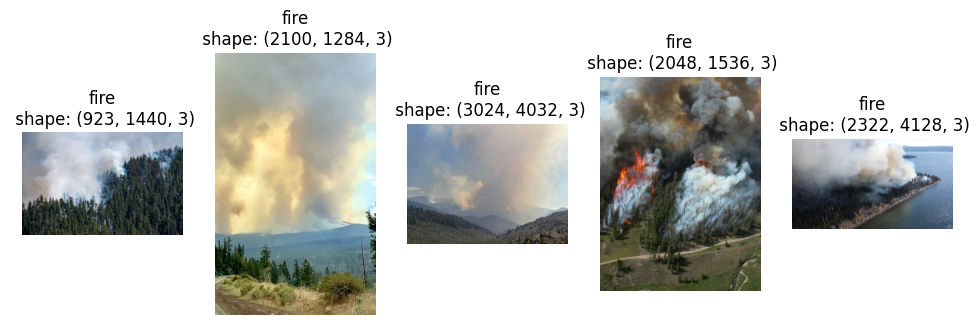

In [13]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path) [i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]}\n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [14]:
img_width, img_height = 150, 150
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size =(img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size =(img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 402 images belonging to 2 classes.


In [16]:
class_mapping = train_generator.class_indices
class_names = list(class_mapping.keys())
print("Class Names:",class_names)

class Names ['fire', 'nofire']


In [19]:
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

     Conv2D(64, (3,3),activation='relu'),
     MaxPooling2D(pool_size=(2,2)),

     Conv2D(128, (3,3),activation='relu'),
     MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
]
)




